<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2021-ban7002/blob/main/Week_4_Clean_and_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean and Transform

In [1]:
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Import Data


In [2]:
opioid = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/2023_BAN6005/main/module_3/data/NC_OPIOID_ANALYSIS.csv")
opioid.head()

,NPI,Credentials,Gender,Entity_Type,Street_Address_1,Street_Address_2,State_Code,Provider_Type,Num_of_Services,Num_of_Medicare_Beneficiaries,...,HYDROCODONE_script_count,tramadol_script_count,Percocet_script_count,oxycodone_script_count,fentanyl_script_count,levothyroxine_script_count,potassium_script_count,metformin_script_count,diltiazem_script_count,gabapentin_script_count
0,1003007964,PA-C,F,I,3101 LATROBE DR,NaN,NC,Physician Assistant,103.00,82,...,34,0,0,0,0,0,0,0,0,0
1,1003011578,M.D.,F,I,415 N CENTER ST,SUITE 300,NC,Gastroenterology,1281.00,530,...,0,0,0,0,0,0,0,0,0,0
2,1003013756,D.O.,M,I,2651 MORGANTON BLVD SW,NaN,NC,Family Practice,1476.00,474,...,40,32,15,0,0,81,0,173,0,60
3,1003026550,PA-C,M,I,301 YADKIN ST,NaN,NC,Physician Assistant,1176.00,256,...,123,11,309,633,33,0,0,0,0,23
4,1003031691,M.D.,M,I,2800 BLUE RIDGE RD STE 201,NaN,NC,Internal Medicine,1741.00,559,...,0,0,0,0,0,0,0,0,0,0


In [3]:
opioid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13841 entries, 0 to 13840
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NPI                            13841 non-null  int64  
 1   Credentials                    13555 non-null  object 
 2   Gender                         13841 non-null  object 
 3   Entity_Type                    13841 non-null  object 
 4   Street_Address_1               13841 non-null  object 
 5   Street_Address_2               5291 non-null   object 
 6   State_Code                     13841 non-null  object 
 7   Provider_Type                  13841 non-null  object 
 8   Num_of_Services                13841 non-null  float64
 9   Num_of_Medicare_Beneficiaries  13841 non-null  int64  
 10  Total_Medicare_Payment_Amt     13841 non-null  float64
 11  Average_Age_of_Beneficiaries   13841 non-null  int64  
 12  Medical_school_name            13841 non-null 

## Series DataType Conversion


---

Convert 'Average_Age_of_Beneficiaries' from int to float using .astype(float)


In [4]:
opioid['Average_Age_of_Beneficiaries'] = opioid['Average_Age_of_Beneficiaries'].astype(float)
opioid['Average_Age_of_Beneficiaries'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13841 entries, 0 to 13840
Series name: Average_Age_of_Beneficiaries
Non-Null Count  Dtype  
--------------  -----  
13841 non-null  float64
dtypes: float64(1)
memory usage: 108.3 KB


## Series Math


---

Create a new column 'amt_per_bene' divide Total_Medicare_Payment_Amt by Num_of_Medicare_Beneficiaries

<Axes: xlabel='amt_per_bene', ylabel='Count'>

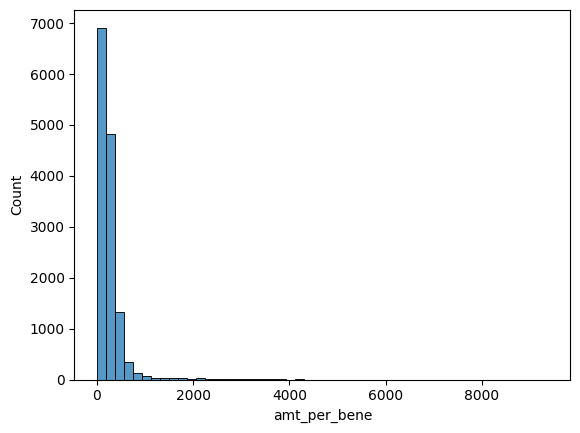

In [5]:
opioid['amt_per_bene'] = opioid['Total_Medicare_Payment_Amt'] / opioid['Num_of_Medicare_Beneficiaries']
sns.histplot(data=opioid, x='amt_per_bene', bins = 50)

## Summarize then Filter


---

1. what is the average oxycodone_day_count?
2. how many physicans are within 2 or 3 STDv from the mean? does the adage:
  - About 95% falls within 2 standard deviations.
  - About 99.7% falls within 3 standard deviations.

In [6]:
mean_oxycodone_day_count = opioid['oxycodone_day_count'].mean()
std_oxycodone_day_count = opioid['oxycodone_day_count'].std()
print(f'mean oxycodone day count is {mean_oxycodone_day_count:4.2f}')



mean oxycodone day count is 493.34


In [7]:
phys_tf_mask = opioid['oxycodone_day_count'] > (2 *  std_oxycodone_day_count) + mean_oxycodone_day_count
phys_tf_mask.value_counts(normalize=True)

,proportion
oxycodone_day_count,
False,0.98
True,0.02


In [8]:
phys_tf_mask = opioid['oxycodone_day_count'] > (3 *  std_oxycodone_day_count) + mean_oxycodone_day_count
phys_tf_mask.value_counts(normalize=True)

,proportion
oxycodone_day_count,
False,0.99
True,0.01


In [9]:
opioid[phys_tf_mask]['Primary_specialty'].value_counts()

,count
Primary_specialty,
PHYSICIAN ASSISTANT,42
NURSE PRACTITIONER,28
FAMILY PRACTICE,23
PHYSICAL MEDICINE AND REHABILITATION,18
ANESTHESIOLOGY,16
INTERNAL MEDICINE,16
INTERVENTIONAL PAIN MANAGEMENT,11
PAIN MANAGEMENT,7
ORTHOPEDIC SURGERY,4


## Deal w. Strings


---

count up `Credentials`,



In [10]:
opioid['Credentials'].value_counts().head()

,count
Credentials,
MD,4604
M.D.,4163
PA-C,1006
PA,382
O.D.,343


# Look for credentials that start with "M"

In [11]:
opioid['Credentials'] = opioid['Credentials'].fillna('NULL')

In [12]:
filter_mask = opioid['Credentials'].str.startswith('M')
res = opioid[filter_mask]
res.shape

(9192, 42)

In [13]:
res['Credentials'].value_counts()

,count
Credentials,
MD,4604
M.D.,4163
M.D,103
M. D.,62
"MD, MPH",12
...,...
"MSN,RNCS,CCD,FNP-C",1
MD FACG,1
MD.,1


## Remove punctuation and spaces



In [14]:
import string
# Remove punctuation and spaces
res['Credentials'].str.replace('['+string.punctuation+' ]', '', regex=True)

,Credentials
1,MD
4,MD
5,MD
9,MD
11,MD
...,...
13835,MD
13836,MD
13837,MD
13838,MD


In [15]:
res['Credentials'] = res['Credentials'].str.replace('['+string.punctuation+' ]', '', regex=True)
res['Credentials'].value_counts()

,count
Credentials,
MD,8953
MDPHD,36
MDMPH,31
MDFACS,13
MDFACP,10
...,...
MDFACG,1
MSNACNPBC,1
MSNFNPPMHNPBC,1


## Substring / slice

We want just the first 2 letters, ie. substring the result. to do this we use the str.slice() method

In [16]:
res['Credentials'].str.slice(0,2).value_counts()

,count
Credentials,
MD,9105
MS,47
MB,13
MP,8
MM,6
ME,5
MH,5
MA,1
M,1


In [17]:
res['Credentials'] = res['Credentials'].str.slice(0,2)
res['Credentials'].value_counts()

,count
Credentials,
MD,9105
MS,47
MB,13
MP,8
MM,6
ME,5
MH,5
MA,1
M,1


# Format Date into a string


---

.dt.strftime()

# Common Formats
- %Y: 4-digit year (e.g., 2023)
- %y: 2-digit year (e.g., 23)
- %m: 2-digit month (e.g., 01, 12)
- %B: Full month name (e.g., January, December)
- %b: Abbreviated month name (e.g., Jan, Dec)
- %d: 2-digit day of the month (e.g., 01, 31)
- %j: Day of the year as a zero-padded decimal number (e.g., 001, 365)
- %A: Full weekday name (e.g., Monday, Sunday)
- %a: Abbreviated weekday name (e.g., Mon, Sun)

```python
dates = pd.date_range(start='2023-01-01', end='2023-12-31')
formatted_dates = dates.to_series().dt.strftime('%Y-%m-%d')
```

In [24]:
msft = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/2023_BAN6005/refs/heads/main/module_4/data/MSFT%20Historical%20Data_4Y.csv")
msft.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/19/2024,416.63,413.00,417.93,411.59,11.09M,0.21%
1,11/18/2024,415.76,414.87,418.40,412.10,24.74M,0.18%
2,11/15/2024,415.00,419.82,422.80,413.64,28.25M,-2.79%
3,11/14/2024,426.89,425.00,428.17,420.00,30.25M,0.40%
4,11/13/2024,425.20,421.64,429.33,418.21,21.50M,0.51%


In [25]:
import datetime
msft['month_year'] = msft['Date'].dt.strftime("%b-%Y")
msft.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [26]:
msft['Date'] = pd.to_datetime(msft['Date'])
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1006 non-null   datetime64[ns]
 1   Price     1006 non-null   float64       
 2   Open      1006 non-null   float64       
 3   High      1006 non-null   float64       
 4   Low       1006 non-null   float64       
 5   Vol.      1006 non-null   object        
 6   Change %  1006 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 55.1+ KB


In [27]:
msft['month_year'] = msft['Date'].dt.strftime("%b-%Y")
msft.head()

,Date,Price,Open,High,Low,Vol.,Change %,month_year
0,2024-11-19,416.63,413.00,417.93,411.59,11.09M,0.21%,Nov-2024
1,2024-11-18,415.76,414.87,418.40,412.10,24.74M,0.18%,Nov-2024
2,2024-11-15,415.00,419.82,422.80,413.64,28.25M,-2.79%,Nov-2024
3,2024-11-14,426.89,425.00,428.17,420.00,30.25M,0.40%,Nov-2024
4,2024-11-13,425.20,421.64,429.33,418.21,21.50M,0.51%,Nov-2024
